In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from packages import general, bh, fmm

In [2]:
particle_nums = np.logspace(1, 5, 20, dtype=int)

theta = 0.5
n_crit = 2

precision = 4

dir_times, bh_times, fmm_times = [], [], []
dir_done, bh_done, fmm_done = False, False, False

for particle_num in particle_nums:
    print(f'Number: {particle_num}')
    particles = [general.Particle(mass_like=True) for _ in range(particle_num)]

    if not dir_done:
        dir_time = %timeit -o general.pairwise.potentials(particles, zero_potentials=True)
        dir_times.append(dir_time)
        if dir_time.average > 10:
            dir_done = True

    if not bh_done:
        bh_method = bh.BH(particles, theta, n_crit)
        bh_time = %timeit -o bh_method.do_bh(zero_potentials=True)
        bh_times.append(bh_time)
        if bh_time.average > 10:
            bh_done = True

    if not fmm_done:
        fmm_method = fmm.FMM(particles, precision)
        fmm_time = %timeit -o fmm_method.do_fmm(zero_expansions=True, zero_potentials=True)
        fmm_times.append(fmm_time)
        if fmm_time.average > 10:
            fmm_done = True

Number: 10
19.2 µs ± 585 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
225 µs ± 3.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
354 µs ± 51.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Number: 16
47.9 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
504 µs ± 60.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.81 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number: 26
128 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
817 µs ± 67 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.18 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number: 42
387 µs ± 134 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.69 ms ± 57.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.52 ms ± 84.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number: 69
881 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each

In [3]:
dir_avgs = [time.average for time in dir_times]
dir_stdvs = [time.stdev for time in dir_times]
bh_avgs = [time.average for time in bh_times]
bh_stdvs = [time.stdev for time in bh_times]
fmm_avgs = [time.average for time in fmm_times]
fmm_stdvs = [time.stdev for time in fmm_times]

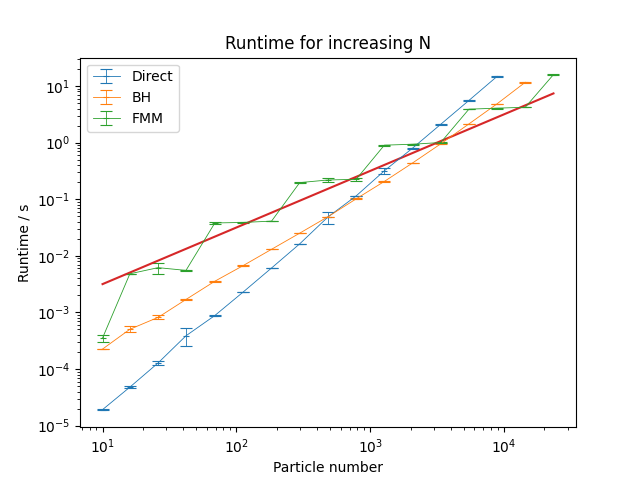

In [18]:
fig, ax = plt.subplots()

ax.errorbar(particle_nums[:len(dir_avgs)], dir_avgs, dir_stdvs, fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='Direct')
ax.errorbar(particle_nums[:len(bh_avgs)],  bh_avgs,  bh_stdvs,  fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='BH')
ax.errorbar(particle_nums[:len(fmm_avgs)], fmm_avgs, fmm_stdvs, fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='FMM')

ax.plot(particle_nums[:len(fmm_avgs)], particle_nums[:len(fmm_avgs)]*10**-3.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Particle number")
ax.set_ylabel("Runtime / s")
ax.set_title("Runtime for increasing N")
ax.legend()

plt.show()